In [74]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [75]:
image_path = "Image.jpeg"

image = cv2.imread(image_path)

# cv2 uses BGR but matplotlib uses RGB (ensures colors display correcly when plotting)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert color to grayscale (originaly the image had 3 channels but now it only has 1)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


print(f"RGB Image Shape: {image_rgb.shape}")
print(f"Grayscale Image Shape: {image_gray.shape}")

RGB Image Shape: (500, 500, 3)
Grayscale Image Shape: (500, 500)


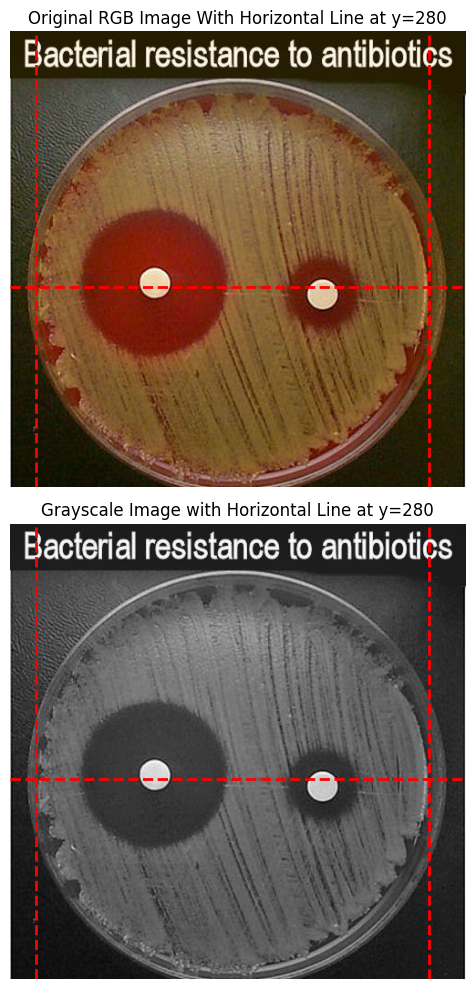

In [76]:
starting_x = 28
ending_x = 460
y = 280

# get all pixels at row y (with x values between 28-460)
horizontal_line = image_gray[y, starting_x:ending_x]
norm_line = horizontal_line / 255.0    # convert to floats between 0-1 (normalize pixel values)


plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.imshow(image_rgb)
plt.axhline(y=y, color='r', linestyle='--', linewidth=2)
plt.axvline(x=starting_x, color='r', linestyle='--', linewidth=2)
plt.axvline(x=ending_x, color='r', linestyle='--', linewidth=2)
plt.title('Original RGB Image With Horizontal Line at y=280')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(image_gray, cmap='gray')
plt.axhline(y=y, color='r', linestyle='--', linewidth=2)
plt.axvline(x=starting_x, color='r', linestyle='--', linewidth=2)
plt.axvline(x=ending_x, color='r', linestyle='--', linewidth=2)
plt.title('Grayscale Image with Horizontal Line at y=280')
plt.axis('off')

plt.tight_layout()
plt.show()

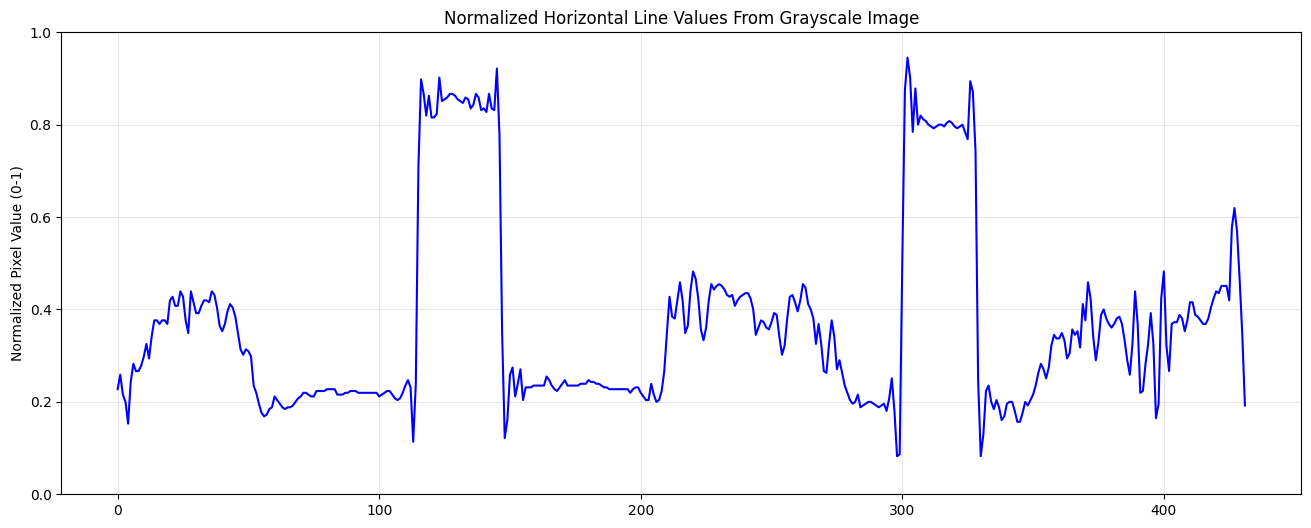

In [77]:
# plotting the normalized values 
plt.figure(figsize=(16, 6))
plt.plot(range(len(norm_line)), norm_line, 'b-', linewidth=1.5)
plt.ylabel('Normalized Pixel Value (0-1)')
plt.title('Normalized Horizontal Line Values From Grayscale Image')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

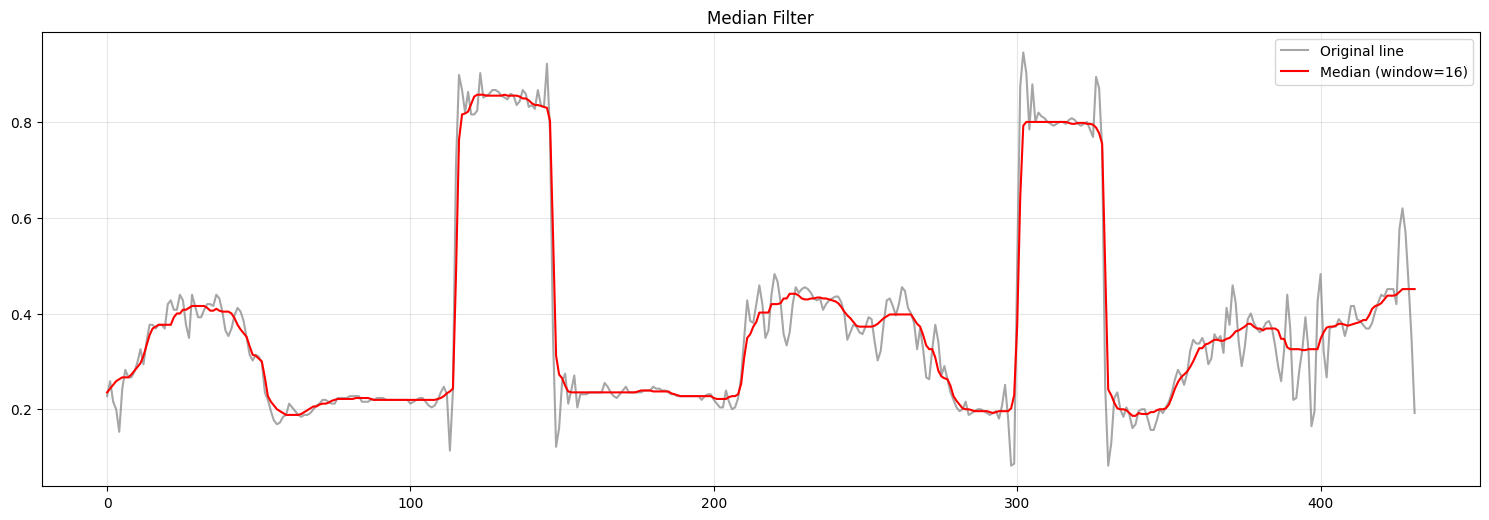

In [78]:
# applying median with a window of 10 pixels to reduce noise
# it's also a good way for outliers

window_size = 16
half_window_size = window_size // 2
median_norm_line = np.zeros_like(norm_line)

for i in range(len(norm_line)):
    start = max(0, i - half_window_size)                     # Ensures we don't go before start of array
    end = min(len(norm_line), i + half_window_size)          # Ensures we don't go past end of array
    median_norm_line[i] = np.median(norm_line[start:end])    # apply median


# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 2)
plt.plot(norm_line, 'gray', alpha=0.7, label='Original line')
plt.plot(median_norm_line, 'r-', label=f'Median (window={window_size})')
plt.title('Median Filter')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

In [79]:
# ~~~~~~~~~~~~~~~~~~~~~~~~this cell applies K-Means clustering with PURE NUMPY~~~~~~~~~~~~~~~~~~~~~~~~


# why use K-Means algorithm:
# 1. we have unlabeled data
# 2. we dont have pre-existing categories
# so basically K-Means goal is to group similar items (in this case 3 clusters)

# how K-Means clustering work:
# 1. Choose how many clusters (groups) you want (K=3 in this case)
# 2. Randomly place 3 "center points" somewhere in your data
# 3. Each data point joins the nearest center point
# 4. Move each center point to the middle of its cluster
# 5. Repeat steps 3-4 until the centers stop moving


iteration = 100
clusters = 3
data = median_norm_line

# this gives exactly the same shuffle every time (when choosing the 3 random center points)
# without it we don't get consistent 'Final clustrer centers' everytime
np.random.seed(42)

# randomly choose different center points from our data
center_points = np.random.choice(data, size=clusters, replace=False)

for _ in range (iteration):
    # assign each point to the closest cluster
    # calculates absolute distance from each point to each cluster center
    distance = np.abs(data[:, None] - center_points)    
    labels = np.argmin(distance, axis=1)

    # calculate new center point of each clustre (mean of each cluster)
    new_center_points = np.array([np.mean(data[labels == i]) for i in range(clusters)])

    # break if centers stopped moving
    if np.allclose(center_points, new_center_points):
        break

    # ipdates center points for next iteration
    center_points = new_center_points

# Sort the centers and print them out
sorted_centers = np.sort(center_points)

print(f"Final cluster centers: {sorted_centers}")


Final cluster centers: [0.22535743 0.38477955 0.81714855]


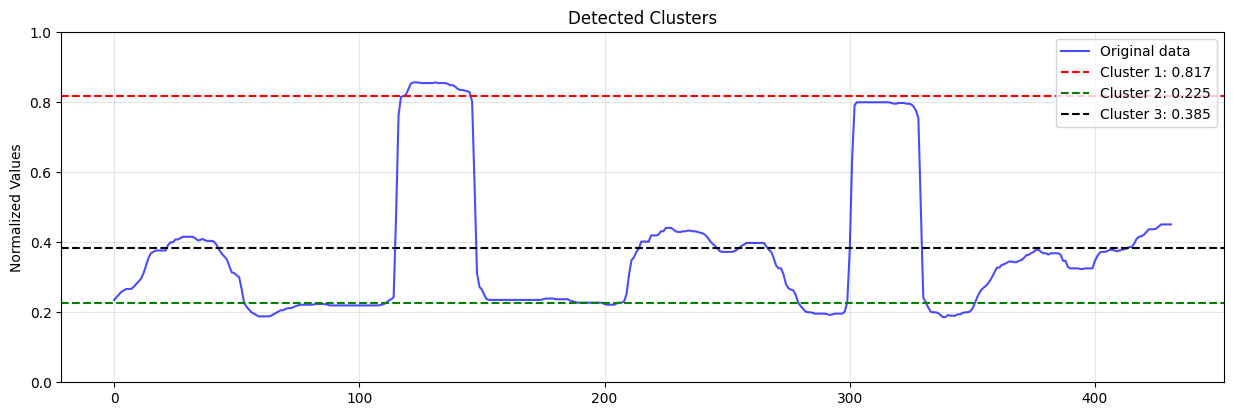

In [80]:
# Plot results
plt.figure(figsize=(15, 10))

# Original data with final cluster centers
plt.subplot(2, 1, 1)
plt.plot(median_norm_line, 'b-', alpha=0.7, label='Original data')
for i, center in enumerate(center_points):
    plt.axhline(y=center, color=['red', 'green', 'black'][i], linestyle='--', 
                label=f'Cluster {i+1}: {center:.3f}')
plt.title('Detected Clusters')
plt.ylabel('Normalized Values')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 1)
plt.show()